In [24]:

# import the necessary packages

from imutils import paths
import pickle
import vptree
import cv2
import numpy as np 
import time 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
from IPython.display import Image, display 
import os 

%matplotlib inline

In [25]:
# create these folders if they do not exist
def build_path(dirName):
    try:
        os.makedirs(dirName)    
        print("Directory " , dirName ,  " Created ")
    except:
        print("Directory " , dirName ,  " already exists")  

In [26]:
def dhash(image, hashSize=8):
	# convert the image to grayscale
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	
	# resize the input image, adding a single column (width) so we
	# can compute the horizontal gradient
	resized = cv2.resize(gray, (hashSize + 1, hashSize))

	# compute the (relative) horizontal gradient between adjacent
	# column pixels
	diff = resized[:, 1:] > resized[:, :-1]

	# convert the difference image to a hash
	return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])


In [27]:

def convert_hash(h):
	# convert the hash to NumPy's 64-bit float and then back to
	# Python's built in int
	return int(np.array(h, dtype="float64"))


In [28]:

def hamming(a, b):
	# compute and return the Hamming distance between the integers
	return bin(int(a) ^ int(b)).count("1")


In [29]:
root_path = "../../data/hashing_search_engine_data/"

# input parameter 

In [30]:

image_collection = input("path to input directory of images. click 'ENTER' key for default value . ") or (root_path+"image_data")


path to input directory of images. click 'ENTER' key for default value . 


In [31]:

path_of_output_vp_tree_file = input("path to output VP-Tree. click 'ENTER' key for default value . ") or "vptree.pickle"


path to output VP-Tree. click 'ENTER' key for default value . 


In [32]:

path_of_output_hash_dictionary_file = input("path to output hashes dictionary. click 'ENTER' key for default value . ") or "hashes.pickle"


path to output hashes dictionary. click 'ENTER' key for default value . 


In [33]:
# grab the paths to the input images and initialize the dictionary
# of hashes
imagePaths = list(paths.list_images(image_collection))
hashes = {}

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
	# load the input image
	print("[INFO] processing image {}/{}".format(i + 1,
		len(imagePaths)))
	image = cv2.imread(imagePath)

	# compute the hash for the image and convert it
	h = dhash(image)
	h = convert_hash(h)

	# update the hashes dictionary
	l = hashes.get(h, [])
	l.append(imagePath)
	hashes[h] = l


[INFO] processing image 1/19977
[INFO] processing image 2/19977
[INFO] processing image 3/19977
[INFO] processing image 4/19977
[INFO] processing image 5/19977
[INFO] processing image 6/19977
[INFO] processing image 7/19977
[INFO] processing image 8/19977
[INFO] processing image 9/19977
[INFO] processing image 10/19977
[INFO] processing image 11/19977
[INFO] processing image 12/19977
[INFO] processing image 13/19977
[INFO] processing image 14/19977
[INFO] processing image 15/19977
[INFO] processing image 16/19977
[INFO] processing image 17/19977
[INFO] processing image 18/19977
[INFO] processing image 19/19977
[INFO] processing image 20/19977
[INFO] processing image 21/19977
[INFO] processing image 22/19977
[INFO] processing image 23/19977
[INFO] processing image 24/19977
[INFO] processing image 25/19977
[INFO] processing image 26/19977
[INFO] processing image 27/19977
[INFO] processing image 28/19977
[INFO] processing image 29/19977
[INFO] processing image 30/19977
[INFO] processing i

[INFO] processing image 256/19977
[INFO] processing image 257/19977
[INFO] processing image 258/19977
[INFO] processing image 259/19977
[INFO] processing image 260/19977
[INFO] processing image 261/19977
[INFO] processing image 262/19977
[INFO] processing image 263/19977
[INFO] processing image 264/19977
[INFO] processing image 265/19977
[INFO] processing image 266/19977
[INFO] processing image 267/19977
[INFO] processing image 268/19977
[INFO] processing image 269/19977
[INFO] processing image 270/19977
[INFO] processing image 271/19977
[INFO] processing image 272/19977
[INFO] processing image 273/19977
[INFO] processing image 274/19977
[INFO] processing image 275/19977
[INFO] processing image 276/19977
[INFO] processing image 277/19977
[INFO] processing image 278/19977
[INFO] processing image 279/19977
[INFO] processing image 280/19977
[INFO] processing image 281/19977
[INFO] processing image 282/19977
[INFO] processing image 283/19977
[INFO] processing image 284/19977
[INFO] process

[INFO] processing image 518/19977
[INFO] processing image 519/19977
[INFO] processing image 520/19977
[INFO] processing image 521/19977
[INFO] processing image 522/19977
[INFO] processing image 523/19977
[INFO] processing image 524/19977
[INFO] processing image 525/19977
[INFO] processing image 526/19977
[INFO] processing image 527/19977
[INFO] processing image 528/19977
[INFO] processing image 529/19977
[INFO] processing image 530/19977
[INFO] processing image 531/19977
[INFO] processing image 532/19977
[INFO] processing image 533/19977
[INFO] processing image 534/19977
[INFO] processing image 535/19977
[INFO] processing image 536/19977
[INFO] processing image 537/19977
[INFO] processing image 538/19977
[INFO] processing image 539/19977
[INFO] processing image 540/19977
[INFO] processing image 541/19977
[INFO] processing image 542/19977
[INFO] processing image 543/19977
[INFO] processing image 544/19977
[INFO] processing image 545/19977
[INFO] processing image 546/19977
[INFO] process

[INFO] processing image 1001/19977
[INFO] processing image 1002/19977
[INFO] processing image 1003/19977
[INFO] processing image 1004/19977
[INFO] processing image 1005/19977
[INFO] processing image 1006/19977
[INFO] processing image 1007/19977
[INFO] processing image 1008/19977
[INFO] processing image 1009/19977
[INFO] processing image 1010/19977
[INFO] processing image 1011/19977
[INFO] processing image 1012/19977
[INFO] processing image 1013/19977
[INFO] processing image 1014/19977
[INFO] processing image 1015/19977
[INFO] processing image 1016/19977
[INFO] processing image 1017/19977
[INFO] processing image 1018/19977
[INFO] processing image 1019/19977
[INFO] processing image 1020/19977
[INFO] processing image 1021/19977
[INFO] processing image 1022/19977
[INFO] processing image 1023/19977
[INFO] processing image 1024/19977
[INFO] processing image 1025/19977
[INFO] processing image 1026/19977
[INFO] processing image 1027/19977
[INFO] processing image 1028/19977
[INFO] processing im

[INFO] processing image 1241/19977
[INFO] processing image 1242/19977
[INFO] processing image 1243/19977
[INFO] processing image 1244/19977
[INFO] processing image 1245/19977
[INFO] processing image 1246/19977
[INFO] processing image 1247/19977
[INFO] processing image 1248/19977
[INFO] processing image 1249/19977
[INFO] processing image 1250/19977
[INFO] processing image 1251/19977
[INFO] processing image 1252/19977
[INFO] processing image 1253/19977
[INFO] processing image 1254/19977
[INFO] processing image 1255/19977
[INFO] processing image 1256/19977
[INFO] processing image 1257/19977
[INFO] processing image 1258/19977
[INFO] processing image 1259/19977
[INFO] processing image 1260/19977
[INFO] processing image 1261/19977
[INFO] processing image 1262/19977
[INFO] processing image 1263/19977
[INFO] processing image 1264/19977
[INFO] processing image 1265/19977
[INFO] processing image 1266/19977
[INFO] processing image 1267/19977
[INFO] processing image 1268/19977
[INFO] processing im

[INFO] processing image 1480/19977
[INFO] processing image 1481/19977
[INFO] processing image 1482/19977
[INFO] processing image 1483/19977
[INFO] processing image 1484/19977
[INFO] processing image 1485/19977
[INFO] processing image 1486/19977
[INFO] processing image 1487/19977
[INFO] processing image 1488/19977
[INFO] processing image 1489/19977
[INFO] processing image 1490/19977
[INFO] processing image 1491/19977
[INFO] processing image 1492/19977
[INFO] processing image 1493/19977
[INFO] processing image 1494/19977
[INFO] processing image 1495/19977
[INFO] processing image 1496/19977
[INFO] processing image 1497/19977
[INFO] processing image 1498/19977
[INFO] processing image 1499/19977
[INFO] processing image 1500/19977
[INFO] processing image 1501/19977
[INFO] processing image 1502/19977
[INFO] processing image 1503/19977
[INFO] processing image 1504/19977
[INFO] processing image 1505/19977
[INFO] processing image 1506/19977
[INFO] processing image 1507/19977
[INFO] processing im

[INFO] processing image 1716/19977
[INFO] processing image 1717/19977
[INFO] processing image 1718/19977
[INFO] processing image 1719/19977
[INFO] processing image 1720/19977
[INFO] processing image 1721/19977
[INFO] processing image 1722/19977
[INFO] processing image 1723/19977
[INFO] processing image 1724/19977
[INFO] processing image 1725/19977
[INFO] processing image 1726/19977
[INFO] processing image 1727/19977
[INFO] processing image 1728/19977
[INFO] processing image 1729/19977
[INFO] processing image 1730/19977
[INFO] processing image 1731/19977
[INFO] processing image 1732/19977
[INFO] processing image 1733/19977
[INFO] processing image 1734/19977
[INFO] processing image 1735/19977
[INFO] processing image 1736/19977
[INFO] processing image 1737/19977
[INFO] processing image 1738/19977
[INFO] processing image 1739/19977
[INFO] processing image 1740/19977
[INFO] processing image 1741/19977
[INFO] processing image 1742/19977
[INFO] processing image 1743/19977
[INFO] processing im

[INFO] processing image 1973/19977
[INFO] processing image 1974/19977
[INFO] processing image 1975/19977
[INFO] processing image 1976/19977
[INFO] processing image 1977/19977
[INFO] processing image 1978/19977
[INFO] processing image 1979/19977
[INFO] processing image 1980/19977
[INFO] processing image 1981/19977
[INFO] processing image 1982/19977
[INFO] processing image 1983/19977
[INFO] processing image 1984/19977
[INFO] processing image 1985/19977
[INFO] processing image 1986/19977
[INFO] processing image 1987/19977
[INFO] processing image 1988/19977
[INFO] processing image 1989/19977
[INFO] processing image 1990/19977
[INFO] processing image 1991/19977
[INFO] processing image 1992/19977
[INFO] processing image 1993/19977
[INFO] processing image 1994/19977
[INFO] processing image 1995/19977
[INFO] processing image 1996/19977
[INFO] processing image 1997/19977
[INFO] processing image 1998/19977
[INFO] processing image 1999/19977
[INFO] processing image 2000/19977
[INFO] processing im

[INFO] processing image 2216/19977
[INFO] processing image 2217/19977
[INFO] processing image 2218/19977
[INFO] processing image 2219/19977
[INFO] processing image 2220/19977
[INFO] processing image 2221/19977
[INFO] processing image 2222/19977
[INFO] processing image 2223/19977
[INFO] processing image 2224/19977
[INFO] processing image 2225/19977
[INFO] processing image 2226/19977
[INFO] processing image 2227/19977
[INFO] processing image 2228/19977
[INFO] processing image 2229/19977
[INFO] processing image 2230/19977
[INFO] processing image 2231/19977
[INFO] processing image 2232/19977
[INFO] processing image 2233/19977
[INFO] processing image 2234/19977
[INFO] processing image 2235/19977
[INFO] processing image 2236/19977
[INFO] processing image 2237/19977
[INFO] processing image 2238/19977
[INFO] processing image 2239/19977
[INFO] processing image 2240/19977
[INFO] processing image 2241/19977
[INFO] processing image 2242/19977
[INFO] processing image 2243/19977
[INFO] processing im

[INFO] processing image 2471/19977
[INFO] processing image 2472/19977
[INFO] processing image 2473/19977
[INFO] processing image 2474/19977
[INFO] processing image 2475/19977
[INFO] processing image 2476/19977
[INFO] processing image 2477/19977
[INFO] processing image 2478/19977
[INFO] processing image 2479/19977
[INFO] processing image 2480/19977
[INFO] processing image 2481/19977
[INFO] processing image 2482/19977
[INFO] processing image 2483/19977
[INFO] processing image 2484/19977
[INFO] processing image 2485/19977
[INFO] processing image 2486/19977
[INFO] processing image 2487/19977
[INFO] processing image 2488/19977
[INFO] processing image 2489/19977
[INFO] processing image 2490/19977
[INFO] processing image 2491/19977
[INFO] processing image 2492/19977
[INFO] processing image 2493/19977
[INFO] processing image 2494/19977
[INFO] processing image 2495/19977
[INFO] processing image 2496/19977
[INFO] processing image 2497/19977
[INFO] processing image 2498/19977
[INFO] processing im

[INFO] processing image 2708/19977
[INFO] processing image 2709/19977
[INFO] processing image 2710/19977
[INFO] processing image 2711/19977
[INFO] processing image 2712/19977
[INFO] processing image 2713/19977
[INFO] processing image 2714/19977
[INFO] processing image 2715/19977
[INFO] processing image 2716/19977
[INFO] processing image 2717/19977
[INFO] processing image 2718/19977
[INFO] processing image 2719/19977
[INFO] processing image 2720/19977
[INFO] processing image 2721/19977
[INFO] processing image 2722/19977
[INFO] processing image 2723/19977
[INFO] processing image 2724/19977
[INFO] processing image 2725/19977
[INFO] processing image 2726/19977
[INFO] processing image 2727/19977
[INFO] processing image 2728/19977
[INFO] processing image 2729/19977
[INFO] processing image 2730/19977
[INFO] processing image 2731/19977
[INFO] processing image 2732/19977
[INFO] processing image 2733/19977
[INFO] processing image 2734/19977
[INFO] processing image 2735/19977
[INFO] processing im

[INFO] processing image 2954/19977
[INFO] processing image 2955/19977
[INFO] processing image 2956/19977
[INFO] processing image 2957/19977
[INFO] processing image 2958/19977
[INFO] processing image 2959/19977
[INFO] processing image 2960/19977
[INFO] processing image 2961/19977
[INFO] processing image 2962/19977
[INFO] processing image 2963/19977
[INFO] processing image 2964/19977
[INFO] processing image 2965/19977
[INFO] processing image 2966/19977
[INFO] processing image 2967/19977
[INFO] processing image 2968/19977
[INFO] processing image 2969/19977
[INFO] processing image 2970/19977
[INFO] processing image 2971/19977
[INFO] processing image 2972/19977
[INFO] processing image 2973/19977
[INFO] processing image 2974/19977
[INFO] processing image 2975/19977
[INFO] processing image 2976/19977
[INFO] processing image 2977/19977
[INFO] processing image 2978/19977
[INFO] processing image 2979/19977
[INFO] processing image 2980/19977
[INFO] processing image 2981/19977
[INFO] processing im

[INFO] processing image 3198/19977
[INFO] processing image 3199/19977
[INFO] processing image 3200/19977
[INFO] processing image 3201/19977
[INFO] processing image 3202/19977
[INFO] processing image 3203/19977
[INFO] processing image 3204/19977
[INFO] processing image 3205/19977
[INFO] processing image 3206/19977
[INFO] processing image 3207/19977
[INFO] processing image 3208/19977
[INFO] processing image 3209/19977
[INFO] processing image 3210/19977
[INFO] processing image 3211/19977
[INFO] processing image 3212/19977
[INFO] processing image 3213/19977
[INFO] processing image 3214/19977
[INFO] processing image 3215/19977
[INFO] processing image 3216/19977
[INFO] processing image 3217/19977
[INFO] processing image 3218/19977
[INFO] processing image 3219/19977
[INFO] processing image 3220/19977
[INFO] processing image 3221/19977
[INFO] processing image 3222/19977
[INFO] processing image 3223/19977
[INFO] processing image 3224/19977
[INFO] processing image 3225/19977
[INFO] processing im

[INFO] processing image 3441/19977
[INFO] processing image 3442/19977
[INFO] processing image 3443/19977
[INFO] processing image 3444/19977
[INFO] processing image 3445/19977
[INFO] processing image 3446/19977
[INFO] processing image 3447/19977
[INFO] processing image 3448/19977
[INFO] processing image 3449/19977
[INFO] processing image 3450/19977
[INFO] processing image 3451/19977
[INFO] processing image 3452/19977
[INFO] processing image 3453/19977
[INFO] processing image 3454/19977
[INFO] processing image 3455/19977
[INFO] processing image 3456/19977
[INFO] processing image 3457/19977
[INFO] processing image 3458/19977
[INFO] processing image 3459/19977
[INFO] processing image 3460/19977
[INFO] processing image 3461/19977
[INFO] processing image 3462/19977
[INFO] processing image 3463/19977
[INFO] processing image 3464/19977
[INFO] processing image 3465/19977
[INFO] processing image 3466/19977
[INFO] processing image 3467/19977
[INFO] processing image 3468/19977
[INFO] processing im

[INFO] processing image 3686/19977
[INFO] processing image 3687/19977
[INFO] processing image 3688/19977
[INFO] processing image 3689/19977
[INFO] processing image 3690/19977
[INFO] processing image 3691/19977
[INFO] processing image 3692/19977
[INFO] processing image 3693/19977
[INFO] processing image 3694/19977
[INFO] processing image 3695/19977
[INFO] processing image 3696/19977
[INFO] processing image 3697/19977
[INFO] processing image 3698/19977
[INFO] processing image 3699/19977
[INFO] processing image 3700/19977
[INFO] processing image 3701/19977
[INFO] processing image 3702/19977
[INFO] processing image 3703/19977
[INFO] processing image 3704/19977
[INFO] processing image 3705/19977
[INFO] processing image 3706/19977
[INFO] processing image 3707/19977
[INFO] processing image 3708/19977
[INFO] processing image 3709/19977
[INFO] processing image 3710/19977
[INFO] processing image 3711/19977
[INFO] processing image 3712/19977
[INFO] processing image 3713/19977
[INFO] processing im

[INFO] processing image 3937/19977
[INFO] processing image 3938/19977
[INFO] processing image 3939/19977
[INFO] processing image 3940/19977
[INFO] processing image 3941/19977
[INFO] processing image 3942/19977
[INFO] processing image 3943/19977
[INFO] processing image 3944/19977
[INFO] processing image 3945/19977
[INFO] processing image 3946/19977
[INFO] processing image 3947/19977
[INFO] processing image 3948/19977
[INFO] processing image 3949/19977
[INFO] processing image 3950/19977
[INFO] processing image 3951/19977
[INFO] processing image 3952/19977
[INFO] processing image 3953/19977
[INFO] processing image 3954/19977
[INFO] processing image 3955/19977
[INFO] processing image 3956/19977
[INFO] processing image 3957/19977
[INFO] processing image 3958/19977
[INFO] processing image 3959/19977
[INFO] processing image 3960/19977
[INFO] processing image 3961/19977
[INFO] processing image 3962/19977
[INFO] processing image 3963/19977
[INFO] processing image 3964/19977
[INFO] processing im

[INFO] processing image 4184/19977
[INFO] processing image 4185/19977
[INFO] processing image 4186/19977
[INFO] processing image 4187/19977
[INFO] processing image 4188/19977
[INFO] processing image 4189/19977
[INFO] processing image 4190/19977
[INFO] processing image 4191/19977
[INFO] processing image 4192/19977
[INFO] processing image 4193/19977
[INFO] processing image 4194/19977
[INFO] processing image 4195/19977
[INFO] processing image 4196/19977
[INFO] processing image 4197/19977
[INFO] processing image 4198/19977
[INFO] processing image 4199/19977
[INFO] processing image 4200/19977
[INFO] processing image 4201/19977
[INFO] processing image 4202/19977
[INFO] processing image 4203/19977
[INFO] processing image 4204/19977
[INFO] processing image 4205/19977
[INFO] processing image 4206/19977
[INFO] processing image 4207/19977
[INFO] processing image 4208/19977
[INFO] processing image 4209/19977
[INFO] processing image 4210/19977
[INFO] processing image 4211/19977
[INFO] processing im

[INFO] processing image 4430/19977
[INFO] processing image 4431/19977
[INFO] processing image 4432/19977
[INFO] processing image 4433/19977
[INFO] processing image 4434/19977
[INFO] processing image 4435/19977
[INFO] processing image 4436/19977
[INFO] processing image 4437/19977
[INFO] processing image 4438/19977
[INFO] processing image 4439/19977
[INFO] processing image 4440/19977
[INFO] processing image 4441/19977
[INFO] processing image 4442/19977
[INFO] processing image 4443/19977
[INFO] processing image 4444/19977
[INFO] processing image 4445/19977
[INFO] processing image 4446/19977
[INFO] processing image 4447/19977
[INFO] processing image 4448/19977
[INFO] processing image 4449/19977
[INFO] processing image 4450/19977
[INFO] processing image 4451/19977
[INFO] processing image 4452/19977
[INFO] processing image 4453/19977
[INFO] processing image 4454/19977
[INFO] processing image 4455/19977
[INFO] processing image 4456/19977
[INFO] processing image 4457/19977
[INFO] processing im

[INFO] processing image 4675/19977
[INFO] processing image 4676/19977
[INFO] processing image 4677/19977
[INFO] processing image 4678/19977
[INFO] processing image 4679/19977
[INFO] processing image 4680/19977
[INFO] processing image 4681/19977
[INFO] processing image 4682/19977
[INFO] processing image 4683/19977
[INFO] processing image 4684/19977
[INFO] processing image 4685/19977
[INFO] processing image 4686/19977
[INFO] processing image 4687/19977
[INFO] processing image 4688/19977
[INFO] processing image 4689/19977
[INFO] processing image 4690/19977
[INFO] processing image 4691/19977
[INFO] processing image 4692/19977
[INFO] processing image 4693/19977
[INFO] processing image 4694/19977
[INFO] processing image 4695/19977
[INFO] processing image 4696/19977
[INFO] processing image 4697/19977
[INFO] processing image 4698/19977
[INFO] processing image 4699/19977
[INFO] processing image 4700/19977
[INFO] processing image 4701/19977
[INFO] processing image 4702/19977
[INFO] processing im

[INFO] processing image 4912/19977
[INFO] processing image 4913/19977
[INFO] processing image 4914/19977
[INFO] processing image 4915/19977
[INFO] processing image 4916/19977
[INFO] processing image 4917/19977
[INFO] processing image 4918/19977
[INFO] processing image 4919/19977
[INFO] processing image 4920/19977
[INFO] processing image 4921/19977
[INFO] processing image 4922/19977
[INFO] processing image 4923/19977
[INFO] processing image 4924/19977
[INFO] processing image 4925/19977
[INFO] processing image 4926/19977
[INFO] processing image 4927/19977
[INFO] processing image 4928/19977
[INFO] processing image 4929/19977
[INFO] processing image 4930/19977
[INFO] processing image 4931/19977
[INFO] processing image 4932/19977
[INFO] processing image 4933/19977
[INFO] processing image 4934/19977
[INFO] processing image 4935/19977
[INFO] processing image 4936/19977
[INFO] processing image 4937/19977
[INFO] processing image 4938/19977
[INFO] processing image 4939/19977
[INFO] processing im

[INFO] processing image 5149/19977
[INFO] processing image 5150/19977
[INFO] processing image 5151/19977
[INFO] processing image 5152/19977
[INFO] processing image 5153/19977
[INFO] processing image 5154/19977
[INFO] processing image 5155/19977
[INFO] processing image 5156/19977
[INFO] processing image 5157/19977
[INFO] processing image 5158/19977
[INFO] processing image 5159/19977
[INFO] processing image 5160/19977
[INFO] processing image 5161/19977
[INFO] processing image 5162/19977
[INFO] processing image 5163/19977
[INFO] processing image 5164/19977
[INFO] processing image 5165/19977
[INFO] processing image 5166/19977
[INFO] processing image 5167/19977
[INFO] processing image 5168/19977
[INFO] processing image 5169/19977
[INFO] processing image 5170/19977
[INFO] processing image 5171/19977
[INFO] processing image 5172/19977
[INFO] processing image 5173/19977
[INFO] processing image 5174/19977
[INFO] processing image 5175/19977
[INFO] processing image 5176/19977
[INFO] processing im

[INFO] processing image 5397/19977
[INFO] processing image 5398/19977
[INFO] processing image 5399/19977
[INFO] processing image 5400/19977
[INFO] processing image 5401/19977
[INFO] processing image 5402/19977
[INFO] processing image 5403/19977
[INFO] processing image 5404/19977
[INFO] processing image 5405/19977
[INFO] processing image 5406/19977
[INFO] processing image 5407/19977
[INFO] processing image 5408/19977
[INFO] processing image 5409/19977
[INFO] processing image 5410/19977
[INFO] processing image 5411/19977
[INFO] processing image 5412/19977
[INFO] processing image 5413/19977
[INFO] processing image 5414/19977
[INFO] processing image 5415/19977
[INFO] processing image 5416/19977
[INFO] processing image 5417/19977
[INFO] processing image 5418/19977
[INFO] processing image 5419/19977
[INFO] processing image 5420/19977
[INFO] processing image 5421/19977
[INFO] processing image 5422/19977
[INFO] processing image 5423/19977
[INFO] processing image 5424/19977
[INFO] processing im

[INFO] processing image 5633/19977
[INFO] processing image 5634/19977
[INFO] processing image 5635/19977
[INFO] processing image 5636/19977
[INFO] processing image 5637/19977
[INFO] processing image 5638/19977
[INFO] processing image 5639/19977
[INFO] processing image 5640/19977
[INFO] processing image 5641/19977
[INFO] processing image 5642/19977
[INFO] processing image 5643/19977
[INFO] processing image 5644/19977
[INFO] processing image 5645/19977
[INFO] processing image 5646/19977
[INFO] processing image 5647/19977
[INFO] processing image 5648/19977
[INFO] processing image 5649/19977
[INFO] processing image 5650/19977
[INFO] processing image 5651/19977
[INFO] processing image 5652/19977
[INFO] processing image 5653/19977
[INFO] processing image 5654/19977
[INFO] processing image 5655/19977
[INFO] processing image 5656/19977
[INFO] processing image 5657/19977
[INFO] processing image 5658/19977
[INFO] processing image 5659/19977
[INFO] processing image 5660/19977
[INFO] processing im

[INFO] processing image 5890/19977
[INFO] processing image 5891/19977
[INFO] processing image 5892/19977
[INFO] processing image 5893/19977
[INFO] processing image 5894/19977
[INFO] processing image 5895/19977
[INFO] processing image 5896/19977
[INFO] processing image 5897/19977
[INFO] processing image 5898/19977
[INFO] processing image 5899/19977
[INFO] processing image 5900/19977
[INFO] processing image 5901/19977
[INFO] processing image 5902/19977
[INFO] processing image 5903/19977
[INFO] processing image 5904/19977
[INFO] processing image 5905/19977
[INFO] processing image 5906/19977
[INFO] processing image 5907/19977
[INFO] processing image 5908/19977
[INFO] processing image 5909/19977
[INFO] processing image 5910/19977
[INFO] processing image 5911/19977
[INFO] processing image 5912/19977
[INFO] processing image 5913/19977
[INFO] processing image 5914/19977
[INFO] processing image 5915/19977
[INFO] processing image 5916/19977
[INFO] processing image 5917/19977
[INFO] processing im

[INFO] processing image 6129/19977
[INFO] processing image 6130/19977
[INFO] processing image 6131/19977
[INFO] processing image 6132/19977
[INFO] processing image 6133/19977
[INFO] processing image 6134/19977
[INFO] processing image 6135/19977
[INFO] processing image 6136/19977
[INFO] processing image 6137/19977
[INFO] processing image 6138/19977
[INFO] processing image 6139/19977
[INFO] processing image 6140/19977
[INFO] processing image 6141/19977
[INFO] processing image 6142/19977
[INFO] processing image 6143/19977
[INFO] processing image 6144/19977
[INFO] processing image 6145/19977
[INFO] processing image 6146/19977
[INFO] processing image 6147/19977
[INFO] processing image 6148/19977
[INFO] processing image 6149/19977
[INFO] processing image 6150/19977
[INFO] processing image 6151/19977
[INFO] processing image 6152/19977
[INFO] processing image 6153/19977
[INFO] processing image 6154/19977
[INFO] processing image 6155/19977
[INFO] processing image 6156/19977
[INFO] processing im

[INFO] processing image 6380/19977
[INFO] processing image 6381/19977
[INFO] processing image 6382/19977
[INFO] processing image 6383/19977
[INFO] processing image 6384/19977
[INFO] processing image 6385/19977
[INFO] processing image 6386/19977
[INFO] processing image 6387/19977
[INFO] processing image 6388/19977
[INFO] processing image 6389/19977
[INFO] processing image 6390/19977
[INFO] processing image 6391/19977
[INFO] processing image 6392/19977
[INFO] processing image 6393/19977
[INFO] processing image 6394/19977
[INFO] processing image 6395/19977
[INFO] processing image 6396/19977
[INFO] processing image 6397/19977
[INFO] processing image 6398/19977
[INFO] processing image 6399/19977
[INFO] processing image 6400/19977
[INFO] processing image 6401/19977
[INFO] processing image 6402/19977
[INFO] processing image 6403/19977
[INFO] processing image 6404/19977
[INFO] processing image 6405/19977
[INFO] processing image 6406/19977
[INFO] processing image 6407/19977
[INFO] processing im

[INFO] processing image 6624/19977
[INFO] processing image 6625/19977
[INFO] processing image 6626/19977
[INFO] processing image 6627/19977
[INFO] processing image 6628/19977
[INFO] processing image 6629/19977
[INFO] processing image 6630/19977
[INFO] processing image 6631/19977
[INFO] processing image 6632/19977
[INFO] processing image 6633/19977
[INFO] processing image 6634/19977
[INFO] processing image 6635/19977
[INFO] processing image 6636/19977
[INFO] processing image 6637/19977
[INFO] processing image 6638/19977
[INFO] processing image 6639/19977
[INFO] processing image 6640/19977
[INFO] processing image 6641/19977
[INFO] processing image 6642/19977
[INFO] processing image 6643/19977
[INFO] processing image 6644/19977
[INFO] processing image 6645/19977
[INFO] processing image 6646/19977
[INFO] processing image 6647/19977
[INFO] processing image 6648/19977
[INFO] processing image 6649/19977
[INFO] processing image 6650/19977
[INFO] processing image 6651/19977
[INFO] processing im

[INFO] processing image 6866/19977
[INFO] processing image 6867/19977
[INFO] processing image 6868/19977
[INFO] processing image 6869/19977
[INFO] processing image 6870/19977
[INFO] processing image 6871/19977
[INFO] processing image 6872/19977
[INFO] processing image 6873/19977
[INFO] processing image 6874/19977
[INFO] processing image 6875/19977
[INFO] processing image 6876/19977
[INFO] processing image 6877/19977
[INFO] processing image 6878/19977
[INFO] processing image 6879/19977
[INFO] processing image 6880/19977
[INFO] processing image 6881/19977
[INFO] processing image 6882/19977
[INFO] processing image 6883/19977
[INFO] processing image 6884/19977
[INFO] processing image 6885/19977
[INFO] processing image 6886/19977
[INFO] processing image 6887/19977
[INFO] processing image 6888/19977
[INFO] processing image 6889/19977
[INFO] processing image 6890/19977
[INFO] processing image 6891/19977
[INFO] processing image 6892/19977
[INFO] processing image 6893/19977
[INFO] processing im

[INFO] processing image 7114/19977
[INFO] processing image 7115/19977
[INFO] processing image 7116/19977
[INFO] processing image 7117/19977
[INFO] processing image 7118/19977
[INFO] processing image 7119/19977
[INFO] processing image 7120/19977
[INFO] processing image 7121/19977
[INFO] processing image 7122/19977
[INFO] processing image 7123/19977
[INFO] processing image 7124/19977
[INFO] processing image 7125/19977
[INFO] processing image 7126/19977
[INFO] processing image 7127/19977
[INFO] processing image 7128/19977
[INFO] processing image 7129/19977
[INFO] processing image 7130/19977
[INFO] processing image 7131/19977
[INFO] processing image 7132/19977
[INFO] processing image 7133/19977
[INFO] processing image 7134/19977
[INFO] processing image 7135/19977
[INFO] processing image 7136/19977
[INFO] processing image 7137/19977
[INFO] processing image 7138/19977
[INFO] processing image 7139/19977
[INFO] processing image 7140/19977
[INFO] processing image 7141/19977
[INFO] processing im

[INFO] processing image 7354/19977
[INFO] processing image 7355/19977
[INFO] processing image 7356/19977
[INFO] processing image 7357/19977
[INFO] processing image 7358/19977
[INFO] processing image 7359/19977
[INFO] processing image 7360/19977
[INFO] processing image 7361/19977
[INFO] processing image 7362/19977
[INFO] processing image 7363/19977
[INFO] processing image 7364/19977
[INFO] processing image 7365/19977
[INFO] processing image 7366/19977
[INFO] processing image 7367/19977
[INFO] processing image 7368/19977
[INFO] processing image 7369/19977
[INFO] processing image 7370/19977
[INFO] processing image 7371/19977
[INFO] processing image 7372/19977
[INFO] processing image 7373/19977
[INFO] processing image 7374/19977
[INFO] processing image 7375/19977
[INFO] processing image 7376/19977
[INFO] processing image 7377/19977
[INFO] processing image 7378/19977
[INFO] processing image 7379/19977
[INFO] processing image 7380/19977
[INFO] processing image 7381/19977
[INFO] processing im

[INFO] processing image 7598/19977
[INFO] processing image 7599/19977
[INFO] processing image 7600/19977
[INFO] processing image 7601/19977
[INFO] processing image 7602/19977
[INFO] processing image 7603/19977
[INFO] processing image 7604/19977
[INFO] processing image 7605/19977
[INFO] processing image 7606/19977
[INFO] processing image 7607/19977
[INFO] processing image 7608/19977
[INFO] processing image 7609/19977
[INFO] processing image 7610/19977
[INFO] processing image 7611/19977
[INFO] processing image 7612/19977
[INFO] processing image 7613/19977
[INFO] processing image 7614/19977
[INFO] processing image 7615/19977
[INFO] processing image 7616/19977
[INFO] processing image 7617/19977
[INFO] processing image 7618/19977
[INFO] processing image 7619/19977
[INFO] processing image 7620/19977
[INFO] processing image 7621/19977
[INFO] processing image 7622/19977
[INFO] processing image 7623/19977
[INFO] processing image 7624/19977
[INFO] processing image 7625/19977
[INFO] processing im

[INFO] processing image 7833/19977
[INFO] processing image 7834/19977
[INFO] processing image 7835/19977
[INFO] processing image 7836/19977
[INFO] processing image 7837/19977
[INFO] processing image 7838/19977
[INFO] processing image 7839/19977
[INFO] processing image 7840/19977
[INFO] processing image 7841/19977
[INFO] processing image 7842/19977
[INFO] processing image 7843/19977
[INFO] processing image 7844/19977
[INFO] processing image 7845/19977
[INFO] processing image 7846/19977
[INFO] processing image 7847/19977
[INFO] processing image 7848/19977
[INFO] processing image 7849/19977
[INFO] processing image 7850/19977
[INFO] processing image 7851/19977
[INFO] processing image 7852/19977
[INFO] processing image 7853/19977
[INFO] processing image 7854/19977
[INFO] processing image 7855/19977
[INFO] processing image 7856/19977
[INFO] processing image 7857/19977
[INFO] processing image 7858/19977
[INFO] processing image 7859/19977
[INFO] processing image 7860/19977
[INFO] processing im

[INFO] processing image 8071/19977
[INFO] processing image 8072/19977
[INFO] processing image 8073/19977
[INFO] processing image 8074/19977
[INFO] processing image 8075/19977
[INFO] processing image 8076/19977
[INFO] processing image 8077/19977
[INFO] processing image 8078/19977
[INFO] processing image 8079/19977
[INFO] processing image 8080/19977
[INFO] processing image 8081/19977
[INFO] processing image 8082/19977
[INFO] processing image 8083/19977
[INFO] processing image 8084/19977
[INFO] processing image 8085/19977
[INFO] processing image 8086/19977
[INFO] processing image 8087/19977
[INFO] processing image 8088/19977
[INFO] processing image 8089/19977
[INFO] processing image 8090/19977
[INFO] processing image 8091/19977
[INFO] processing image 8092/19977
[INFO] processing image 8093/19977
[INFO] processing image 8094/19977
[INFO] processing image 8095/19977
[INFO] processing image 8096/19977
[INFO] processing image 8097/19977
[INFO] processing image 8098/19977
[INFO] processing im

[INFO] processing image 8315/19977
[INFO] processing image 8316/19977
[INFO] processing image 8317/19977
[INFO] processing image 8318/19977
[INFO] processing image 8319/19977
[INFO] processing image 8320/19977
[INFO] processing image 8321/19977
[INFO] processing image 8322/19977
[INFO] processing image 8323/19977
[INFO] processing image 8324/19977
[INFO] processing image 8325/19977
[INFO] processing image 8326/19977
[INFO] processing image 8327/19977
[INFO] processing image 8328/19977
[INFO] processing image 8329/19977
[INFO] processing image 8330/19977
[INFO] processing image 8331/19977
[INFO] processing image 8332/19977
[INFO] processing image 8333/19977
[INFO] processing image 8334/19977
[INFO] processing image 8335/19977
[INFO] processing image 8336/19977
[INFO] processing image 8337/19977
[INFO] processing image 8338/19977
[INFO] processing image 8339/19977
[INFO] processing image 8340/19977
[INFO] processing image 8341/19977
[INFO] processing image 8342/19977
[INFO] processing im

[INFO] processing image 8550/19977
[INFO] processing image 8551/19977
[INFO] processing image 8552/19977
[INFO] processing image 8553/19977
[INFO] processing image 8554/19977
[INFO] processing image 8555/19977
[INFO] processing image 8556/19977
[INFO] processing image 8557/19977
[INFO] processing image 8558/19977
[INFO] processing image 8559/19977
[INFO] processing image 8560/19977
[INFO] processing image 8561/19977
[INFO] processing image 8562/19977
[INFO] processing image 8563/19977
[INFO] processing image 8564/19977
[INFO] processing image 8565/19977
[INFO] processing image 8566/19977
[INFO] processing image 8567/19977
[INFO] processing image 8568/19977
[INFO] processing image 8569/19977
[INFO] processing image 8570/19977
[INFO] processing image 8571/19977
[INFO] processing image 8572/19977
[INFO] processing image 8573/19977
[INFO] processing image 8574/19977
[INFO] processing image 8575/19977
[INFO] processing image 8576/19977
[INFO] processing image 8577/19977
[INFO] processing im

[INFO] processing image 8799/19977
[INFO] processing image 8800/19977
[INFO] processing image 8801/19977
[INFO] processing image 8802/19977
[INFO] processing image 8803/19977
[INFO] processing image 8804/19977
[INFO] processing image 8805/19977
[INFO] processing image 8806/19977
[INFO] processing image 8807/19977
[INFO] processing image 8808/19977
[INFO] processing image 8809/19977
[INFO] processing image 8810/19977
[INFO] processing image 8811/19977
[INFO] processing image 8812/19977
[INFO] processing image 8813/19977
[INFO] processing image 8814/19977
[INFO] processing image 8815/19977
[INFO] processing image 8816/19977
[INFO] processing image 8817/19977
[INFO] processing image 8818/19977
[INFO] processing image 8819/19977
[INFO] processing image 8820/19977
[INFO] processing image 8821/19977
[INFO] processing image 8822/19977
[INFO] processing image 8823/19977
[INFO] processing image 8824/19977
[INFO] processing image 8825/19977
[INFO] processing image 8826/19977
[INFO] processing im

[INFO] processing image 9034/19977
[INFO] processing image 9035/19977
[INFO] processing image 9036/19977
[INFO] processing image 9037/19977
[INFO] processing image 9038/19977
[INFO] processing image 9039/19977
[INFO] processing image 9040/19977
[INFO] processing image 9041/19977
[INFO] processing image 9042/19977
[INFO] processing image 9043/19977
[INFO] processing image 9044/19977
[INFO] processing image 9045/19977
[INFO] processing image 9046/19977
[INFO] processing image 9047/19977
[INFO] processing image 9048/19977
[INFO] processing image 9049/19977
[INFO] processing image 9050/19977
[INFO] processing image 9051/19977
[INFO] processing image 9052/19977
[INFO] processing image 9053/19977
[INFO] processing image 9054/19977
[INFO] processing image 9055/19977
[INFO] processing image 9056/19977
[INFO] processing image 9057/19977
[INFO] processing image 9058/19977
[INFO] processing image 9059/19977
[INFO] processing image 9060/19977
[INFO] processing image 9061/19977
[INFO] processing im

[INFO] processing image 9286/19977
[INFO] processing image 9287/19977
[INFO] processing image 9288/19977
[INFO] processing image 9289/19977
[INFO] processing image 9290/19977
[INFO] processing image 9291/19977
[INFO] processing image 9292/19977
[INFO] processing image 9293/19977
[INFO] processing image 9294/19977
[INFO] processing image 9295/19977
[INFO] processing image 9296/19977
[INFO] processing image 9297/19977
[INFO] processing image 9298/19977
[INFO] processing image 9299/19977
[INFO] processing image 9300/19977
[INFO] processing image 9301/19977
[INFO] processing image 9302/19977
[INFO] processing image 9303/19977
[INFO] processing image 9304/19977
[INFO] processing image 9305/19977
[INFO] processing image 9306/19977
[INFO] processing image 9307/19977
[INFO] processing image 9308/19977
[INFO] processing image 9309/19977
[INFO] processing image 9310/19977
[INFO] processing image 9311/19977
[INFO] processing image 9312/19977
[INFO] processing image 9313/19977
[INFO] processing im

[INFO] processing image 9527/19977
[INFO] processing image 9528/19977
[INFO] processing image 9529/19977
[INFO] processing image 9530/19977
[INFO] processing image 9531/19977
[INFO] processing image 9532/19977
[INFO] processing image 9533/19977
[INFO] processing image 9534/19977
[INFO] processing image 9535/19977
[INFO] processing image 9536/19977
[INFO] processing image 9537/19977
[INFO] processing image 9538/19977
[INFO] processing image 9539/19977
[INFO] processing image 9540/19977
[INFO] processing image 9541/19977
[INFO] processing image 9542/19977
[INFO] processing image 9543/19977
[INFO] processing image 9544/19977
[INFO] processing image 9545/19977
[INFO] processing image 9546/19977
[INFO] processing image 9547/19977
[INFO] processing image 9548/19977
[INFO] processing image 9549/19977
[INFO] processing image 9550/19977
[INFO] processing image 9551/19977
[INFO] processing image 9552/19977
[INFO] processing image 9553/19977
[INFO] processing image 9554/19977
[INFO] processing im

[INFO] processing image 9778/19977
[INFO] processing image 9779/19977
[INFO] processing image 9780/19977
[INFO] processing image 9781/19977
[INFO] processing image 9782/19977
[INFO] processing image 9783/19977
[INFO] processing image 9784/19977
[INFO] processing image 9785/19977
[INFO] processing image 9786/19977
[INFO] processing image 9787/19977
[INFO] processing image 9788/19977
[INFO] processing image 9789/19977
[INFO] processing image 9790/19977
[INFO] processing image 9791/19977
[INFO] processing image 9792/19977
[INFO] processing image 9793/19977
[INFO] processing image 9794/19977
[INFO] processing image 9795/19977
[INFO] processing image 9796/19977
[INFO] processing image 9797/19977
[INFO] processing image 9798/19977
[INFO] processing image 9799/19977
[INFO] processing image 9800/19977
[INFO] processing image 9801/19977
[INFO] processing image 9802/19977
[INFO] processing image 9803/19977
[INFO] processing image 9804/19977
[INFO] processing image 9805/19977
[INFO] processing im

[INFO] processing image 10018/19977
[INFO] processing image 10019/19977
[INFO] processing image 10020/19977
[INFO] processing image 10021/19977
[INFO] processing image 10022/19977
[INFO] processing image 10023/19977
[INFO] processing image 10024/19977
[INFO] processing image 10025/19977
[INFO] processing image 10026/19977
[INFO] processing image 10027/19977
[INFO] processing image 10028/19977
[INFO] processing image 10029/19977
[INFO] processing image 10030/19977
[INFO] processing image 10031/19977
[INFO] processing image 10032/19977
[INFO] processing image 10033/19977
[INFO] processing image 10034/19977
[INFO] processing image 10035/19977
[INFO] processing image 10036/19977
[INFO] processing image 10037/19977
[INFO] processing image 10038/19977
[INFO] processing image 10039/19977
[INFO] processing image 10040/19977
[INFO] processing image 10041/19977
[INFO] processing image 10042/19977
[INFO] processing image 10043/19977
[INFO] processing image 10044/19977
[INFO] processing image 1004

[INFO] processing image 10258/19977
[INFO] processing image 10259/19977
[INFO] processing image 10260/19977
[INFO] processing image 10261/19977
[INFO] processing image 10262/19977
[INFO] processing image 10263/19977
[INFO] processing image 10264/19977
[INFO] processing image 10265/19977
[INFO] processing image 10266/19977
[INFO] processing image 10267/19977
[INFO] processing image 10268/19977
[INFO] processing image 10269/19977
[INFO] processing image 10270/19977
[INFO] processing image 10271/19977
[INFO] processing image 10272/19977
[INFO] processing image 10273/19977
[INFO] processing image 10274/19977
[INFO] processing image 10275/19977
[INFO] processing image 10276/19977
[INFO] processing image 10277/19977
[INFO] processing image 10278/19977
[INFO] processing image 10279/19977
[INFO] processing image 10280/19977
[INFO] processing image 10281/19977
[INFO] processing image 10282/19977
[INFO] processing image 10283/19977
[INFO] processing image 10284/19977
[INFO] processing image 1028

[INFO] processing image 10490/19977
[INFO] processing image 10491/19977
[INFO] processing image 10492/19977
[INFO] processing image 10493/19977
[INFO] processing image 10494/19977
[INFO] processing image 10495/19977
[INFO] processing image 10496/19977
[INFO] processing image 10497/19977
[INFO] processing image 10498/19977
[INFO] processing image 10499/19977
[INFO] processing image 10500/19977
[INFO] processing image 10501/19977
[INFO] processing image 10502/19977
[INFO] processing image 10503/19977
[INFO] processing image 10504/19977
[INFO] processing image 10505/19977
[INFO] processing image 10506/19977
[INFO] processing image 10507/19977
[INFO] processing image 10508/19977
[INFO] processing image 10509/19977
[INFO] processing image 10510/19977
[INFO] processing image 10511/19977
[INFO] processing image 10512/19977
[INFO] processing image 10513/19977
[INFO] processing image 10514/19977
[INFO] processing image 10515/19977
[INFO] processing image 10516/19977
[INFO] processing image 1051

[INFO] processing image 10733/19977
[INFO] processing image 10734/19977
[INFO] processing image 10735/19977
[INFO] processing image 10736/19977
[INFO] processing image 10737/19977
[INFO] processing image 10738/19977
[INFO] processing image 10739/19977
[INFO] processing image 10740/19977
[INFO] processing image 10741/19977
[INFO] processing image 10742/19977
[INFO] processing image 10743/19977
[INFO] processing image 10744/19977
[INFO] processing image 10745/19977
[INFO] processing image 10746/19977
[INFO] processing image 10747/19977
[INFO] processing image 10748/19977
[INFO] processing image 10749/19977
[INFO] processing image 10750/19977
[INFO] processing image 10751/19977
[INFO] processing image 10752/19977
[INFO] processing image 10753/19977
[INFO] processing image 10754/19977
[INFO] processing image 10755/19977
[INFO] processing image 10756/19977
[INFO] processing image 10757/19977
[INFO] processing image 10758/19977
[INFO] processing image 10759/19977
[INFO] processing image 1076

[INFO] processing image 10964/19977
[INFO] processing image 10965/19977
[INFO] processing image 10966/19977
[INFO] processing image 10967/19977
[INFO] processing image 10968/19977
[INFO] processing image 10969/19977
[INFO] processing image 10970/19977
[INFO] processing image 10971/19977
[INFO] processing image 10972/19977
[INFO] processing image 10973/19977
[INFO] processing image 10974/19977
[INFO] processing image 10975/19977
[INFO] processing image 10976/19977
[INFO] processing image 10977/19977
[INFO] processing image 10978/19977
[INFO] processing image 10979/19977
[INFO] processing image 10980/19977
[INFO] processing image 10981/19977
[INFO] processing image 10982/19977
[INFO] processing image 10983/19977
[INFO] processing image 10984/19977
[INFO] processing image 10985/19977
[INFO] processing image 10986/19977
[INFO] processing image 10987/19977
[INFO] processing image 10988/19977
[INFO] processing image 10989/19977
[INFO] processing image 10990/19977
[INFO] processing image 1099

[INFO] processing image 11201/19977
[INFO] processing image 11202/19977
[INFO] processing image 11203/19977
[INFO] processing image 11204/19977
[INFO] processing image 11205/19977
[INFO] processing image 11206/19977
[INFO] processing image 11207/19977
[INFO] processing image 11208/19977
[INFO] processing image 11209/19977
[INFO] processing image 11210/19977
[INFO] processing image 11211/19977
[INFO] processing image 11212/19977
[INFO] processing image 11213/19977
[INFO] processing image 11214/19977
[INFO] processing image 11215/19977
[INFO] processing image 11216/19977
[INFO] processing image 11217/19977
[INFO] processing image 11218/19977
[INFO] processing image 11219/19977
[INFO] processing image 11220/19977
[INFO] processing image 11221/19977
[INFO] processing image 11222/19977
[INFO] processing image 11223/19977
[INFO] processing image 11224/19977
[INFO] processing image 11225/19977
[INFO] processing image 11226/19977
[INFO] processing image 11227/19977
[INFO] processing image 1122

[INFO] processing image 11438/19977
[INFO] processing image 11439/19977
[INFO] processing image 11440/19977
[INFO] processing image 11441/19977
[INFO] processing image 11442/19977
[INFO] processing image 11443/19977
[INFO] processing image 11444/19977
[INFO] processing image 11445/19977
[INFO] processing image 11446/19977
[INFO] processing image 11447/19977
[INFO] processing image 11448/19977
[INFO] processing image 11449/19977
[INFO] processing image 11450/19977
[INFO] processing image 11451/19977
[INFO] processing image 11452/19977
[INFO] processing image 11453/19977
[INFO] processing image 11454/19977
[INFO] processing image 11455/19977
[INFO] processing image 11456/19977
[INFO] processing image 11457/19977
[INFO] processing image 11458/19977
[INFO] processing image 11459/19977
[INFO] processing image 11460/19977
[INFO] processing image 11461/19977
[INFO] processing image 11462/19977
[INFO] processing image 11463/19977
[INFO] processing image 11464/19977
[INFO] processing image 1146

[INFO] processing image 11677/19977
[INFO] processing image 11678/19977
[INFO] processing image 11679/19977
[INFO] processing image 11680/19977
[INFO] processing image 11681/19977
[INFO] processing image 11682/19977
[INFO] processing image 11683/19977
[INFO] processing image 11684/19977
[INFO] processing image 11685/19977
[INFO] processing image 11686/19977
[INFO] processing image 11687/19977
[INFO] processing image 11688/19977
[INFO] processing image 11689/19977
[INFO] processing image 11690/19977
[INFO] processing image 11691/19977
[INFO] processing image 11692/19977
[INFO] processing image 11693/19977
[INFO] processing image 11694/19977
[INFO] processing image 11695/19977
[INFO] processing image 11696/19977
[INFO] processing image 11697/19977
[INFO] processing image 11698/19977
[INFO] processing image 11699/19977
[INFO] processing image 11700/19977
[INFO] processing image 11701/19977
[INFO] processing image 11702/19977
[INFO] processing image 11703/19977
[INFO] processing image 1170

[INFO] processing image 11919/19977
[INFO] processing image 11920/19977
[INFO] processing image 11921/19977
[INFO] processing image 11922/19977
[INFO] processing image 11923/19977
[INFO] processing image 11924/19977
[INFO] processing image 11925/19977
[INFO] processing image 11926/19977
[INFO] processing image 11927/19977
[INFO] processing image 11928/19977
[INFO] processing image 11929/19977
[INFO] processing image 11930/19977
[INFO] processing image 11931/19977
[INFO] processing image 11932/19977
[INFO] processing image 11933/19977
[INFO] processing image 11934/19977
[INFO] processing image 11935/19977
[INFO] processing image 11936/19977
[INFO] processing image 11937/19977
[INFO] processing image 11938/19977
[INFO] processing image 11939/19977
[INFO] processing image 11940/19977
[INFO] processing image 11941/19977
[INFO] processing image 11942/19977
[INFO] processing image 11943/19977
[INFO] processing image 11944/19977
[INFO] processing image 11945/19977
[INFO] processing image 1194

[INFO] processing image 12168/19977
[INFO] processing image 12169/19977
[INFO] processing image 12170/19977
[INFO] processing image 12171/19977
[INFO] processing image 12172/19977
[INFO] processing image 12173/19977
[INFO] processing image 12174/19977
[INFO] processing image 12175/19977
[INFO] processing image 12176/19977
[INFO] processing image 12177/19977
[INFO] processing image 12178/19977
[INFO] processing image 12179/19977
[INFO] processing image 12180/19977
[INFO] processing image 12181/19977
[INFO] processing image 12182/19977
[INFO] processing image 12183/19977
[INFO] processing image 12184/19977
[INFO] processing image 12185/19977
[INFO] processing image 12186/19977
[INFO] processing image 12187/19977
[INFO] processing image 12188/19977
[INFO] processing image 12189/19977
[INFO] processing image 12190/19977
[INFO] processing image 12191/19977
[INFO] processing image 12192/19977
[INFO] processing image 12193/19977
[INFO] processing image 12194/19977
[INFO] processing image 1219

[INFO] processing image 12404/19977
[INFO] processing image 12405/19977
[INFO] processing image 12406/19977
[INFO] processing image 12407/19977
[INFO] processing image 12408/19977
[INFO] processing image 12409/19977
[INFO] processing image 12410/19977
[INFO] processing image 12411/19977
[INFO] processing image 12412/19977
[INFO] processing image 12413/19977
[INFO] processing image 12414/19977
[INFO] processing image 12415/19977
[INFO] processing image 12416/19977
[INFO] processing image 12417/19977
[INFO] processing image 12418/19977
[INFO] processing image 12419/19977
[INFO] processing image 12420/19977
[INFO] processing image 12421/19977
[INFO] processing image 12422/19977
[INFO] processing image 12423/19977
[INFO] processing image 12424/19977
[INFO] processing image 12425/19977
[INFO] processing image 12426/19977
[INFO] processing image 12427/19977
[INFO] processing image 12428/19977
[INFO] processing image 12429/19977
[INFO] processing image 12430/19977
[INFO] processing image 1243

[INFO] processing image 12651/19977
[INFO] processing image 12652/19977
[INFO] processing image 12653/19977
[INFO] processing image 12654/19977
[INFO] processing image 12655/19977
[INFO] processing image 12656/19977
[INFO] processing image 12657/19977
[INFO] processing image 12658/19977
[INFO] processing image 12659/19977
[INFO] processing image 12660/19977
[INFO] processing image 12661/19977
[INFO] processing image 12662/19977
[INFO] processing image 12663/19977
[INFO] processing image 12664/19977
[INFO] processing image 12665/19977
[INFO] processing image 12666/19977
[INFO] processing image 12667/19977
[INFO] processing image 12668/19977
[INFO] processing image 12669/19977
[INFO] processing image 12670/19977
[INFO] processing image 12671/19977
[INFO] processing image 12672/19977
[INFO] processing image 12673/19977
[INFO] processing image 12674/19977
[INFO] processing image 12675/19977
[INFO] processing image 12676/19977
[INFO] processing image 12677/19977
[INFO] processing image 1267

[INFO] processing image 12897/19977
[INFO] processing image 12898/19977
[INFO] processing image 12899/19977
[INFO] processing image 12900/19977
[INFO] processing image 12901/19977
[INFO] processing image 12902/19977
[INFO] processing image 12903/19977
[INFO] processing image 12904/19977
[INFO] processing image 12905/19977
[INFO] processing image 12906/19977
[INFO] processing image 12907/19977
[INFO] processing image 12908/19977
[INFO] processing image 12909/19977
[INFO] processing image 12910/19977
[INFO] processing image 12911/19977
[INFO] processing image 12912/19977
[INFO] processing image 12913/19977
[INFO] processing image 12914/19977
[INFO] processing image 12915/19977
[INFO] processing image 12916/19977
[INFO] processing image 12917/19977
[INFO] processing image 12918/19977
[INFO] processing image 12919/19977
[INFO] processing image 12920/19977
[INFO] processing image 12921/19977
[INFO] processing image 12922/19977
[INFO] processing image 12923/19977
[INFO] processing image 1292

[INFO] processing image 13138/19977
[INFO] processing image 13139/19977
[INFO] processing image 13140/19977
[INFO] processing image 13141/19977
[INFO] processing image 13142/19977
[INFO] processing image 13143/19977
[INFO] processing image 13144/19977
[INFO] processing image 13145/19977
[INFO] processing image 13146/19977
[INFO] processing image 13147/19977
[INFO] processing image 13148/19977
[INFO] processing image 13149/19977
[INFO] processing image 13150/19977
[INFO] processing image 13151/19977
[INFO] processing image 13152/19977
[INFO] processing image 13153/19977
[INFO] processing image 13154/19977
[INFO] processing image 13155/19977
[INFO] processing image 13156/19977
[INFO] processing image 13157/19977
[INFO] processing image 13158/19977
[INFO] processing image 13159/19977
[INFO] processing image 13160/19977
[INFO] processing image 13161/19977
[INFO] processing image 13162/19977
[INFO] processing image 13163/19977
[INFO] processing image 13164/19977
[INFO] processing image 1316

[INFO] processing image 13369/19977
[INFO] processing image 13370/19977
[INFO] processing image 13371/19977
[INFO] processing image 13372/19977
[INFO] processing image 13373/19977
[INFO] processing image 13374/19977
[INFO] processing image 13375/19977
[INFO] processing image 13376/19977
[INFO] processing image 13377/19977
[INFO] processing image 13378/19977
[INFO] processing image 13379/19977
[INFO] processing image 13380/19977
[INFO] processing image 13381/19977
[INFO] processing image 13382/19977
[INFO] processing image 13383/19977
[INFO] processing image 13384/19977
[INFO] processing image 13385/19977
[INFO] processing image 13386/19977
[INFO] processing image 13387/19977
[INFO] processing image 13388/19977
[INFO] processing image 13389/19977
[INFO] processing image 13390/19977
[INFO] processing image 13391/19977
[INFO] processing image 13392/19977
[INFO] processing image 13393/19977
[INFO] processing image 13394/19977
[INFO] processing image 13395/19977
[INFO] processing image 1339

[INFO] processing image 13609/19977
[INFO] processing image 13610/19977
[INFO] processing image 13611/19977
[INFO] processing image 13612/19977
[INFO] processing image 13613/19977
[INFO] processing image 13614/19977
[INFO] processing image 13615/19977
[INFO] processing image 13616/19977
[INFO] processing image 13617/19977
[INFO] processing image 13618/19977
[INFO] processing image 13619/19977
[INFO] processing image 13620/19977
[INFO] processing image 13621/19977
[INFO] processing image 13622/19977
[INFO] processing image 13623/19977
[INFO] processing image 13624/19977
[INFO] processing image 13625/19977
[INFO] processing image 13626/19977
[INFO] processing image 13627/19977
[INFO] processing image 13628/19977
[INFO] processing image 13629/19977
[INFO] processing image 13630/19977
[INFO] processing image 13631/19977
[INFO] processing image 13632/19977
[INFO] processing image 13633/19977
[INFO] processing image 13634/19977
[INFO] processing image 13635/19977
[INFO] processing image 1363

[INFO] processing image 13838/19977
[INFO] processing image 13839/19977
[INFO] processing image 13840/19977
[INFO] processing image 13841/19977
[INFO] processing image 13842/19977
[INFO] processing image 13843/19977
[INFO] processing image 13844/19977
[INFO] processing image 13845/19977
[INFO] processing image 13846/19977
[INFO] processing image 13847/19977
[INFO] processing image 13848/19977
[INFO] processing image 13849/19977
[INFO] processing image 13850/19977
[INFO] processing image 13851/19977
[INFO] processing image 13852/19977
[INFO] processing image 13853/19977
[INFO] processing image 13854/19977
[INFO] processing image 13855/19977
[INFO] processing image 13856/19977
[INFO] processing image 13857/19977
[INFO] processing image 13858/19977
[INFO] processing image 13859/19977
[INFO] processing image 13860/19977
[INFO] processing image 13861/19977
[INFO] processing image 13862/19977
[INFO] processing image 13863/19977
[INFO] processing image 13864/19977
[INFO] processing image 1386

[INFO] processing image 14085/19977
[INFO] processing image 14086/19977
[INFO] processing image 14087/19977
[INFO] processing image 14088/19977
[INFO] processing image 14089/19977
[INFO] processing image 14090/19977
[INFO] processing image 14091/19977
[INFO] processing image 14092/19977
[INFO] processing image 14093/19977
[INFO] processing image 14094/19977
[INFO] processing image 14095/19977
[INFO] processing image 14096/19977
[INFO] processing image 14097/19977
[INFO] processing image 14098/19977
[INFO] processing image 14099/19977
[INFO] processing image 14100/19977
[INFO] processing image 14101/19977
[INFO] processing image 14102/19977
[INFO] processing image 14103/19977
[INFO] processing image 14104/19977
[INFO] processing image 14105/19977
[INFO] processing image 14106/19977
[INFO] processing image 14107/19977
[INFO] processing image 14108/19977
[INFO] processing image 14109/19977
[INFO] processing image 14110/19977
[INFO] processing image 14111/19977
[INFO] processing image 1411

[INFO] processing image 14323/19977
[INFO] processing image 14324/19977
[INFO] processing image 14325/19977
[INFO] processing image 14326/19977
[INFO] processing image 14327/19977
[INFO] processing image 14328/19977
[INFO] processing image 14329/19977
[INFO] processing image 14330/19977
[INFO] processing image 14331/19977
[INFO] processing image 14332/19977
[INFO] processing image 14333/19977
[INFO] processing image 14334/19977
[INFO] processing image 14335/19977
[INFO] processing image 14336/19977
[INFO] processing image 14337/19977
[INFO] processing image 14338/19977
[INFO] processing image 14339/19977
[INFO] processing image 14340/19977
[INFO] processing image 14341/19977
[INFO] processing image 14342/19977
[INFO] processing image 14343/19977
[INFO] processing image 14344/19977
[INFO] processing image 14345/19977
[INFO] processing image 14346/19977
[INFO] processing image 14347/19977
[INFO] processing image 14348/19977
[INFO] processing image 14349/19977
[INFO] processing image 1435

[INFO] processing image 14554/19977
[INFO] processing image 14555/19977
[INFO] processing image 14556/19977
[INFO] processing image 14557/19977
[INFO] processing image 14558/19977
[INFO] processing image 14559/19977
[INFO] processing image 14560/19977
[INFO] processing image 14561/19977
[INFO] processing image 14562/19977
[INFO] processing image 14563/19977
[INFO] processing image 14564/19977
[INFO] processing image 14565/19977
[INFO] processing image 14566/19977
[INFO] processing image 14567/19977
[INFO] processing image 14568/19977
[INFO] processing image 14569/19977
[INFO] processing image 14570/19977
[INFO] processing image 14571/19977
[INFO] processing image 14572/19977
[INFO] processing image 14573/19977
[INFO] processing image 14574/19977
[INFO] processing image 14575/19977
[INFO] processing image 14576/19977
[INFO] processing image 14577/19977
[INFO] processing image 14578/19977
[INFO] processing image 14579/19977
[INFO] processing image 14580/19977
[INFO] processing image 1458

[INFO] processing image 14804/19977
[INFO] processing image 14805/19977
[INFO] processing image 14806/19977
[INFO] processing image 14807/19977
[INFO] processing image 14808/19977
[INFO] processing image 14809/19977
[INFO] processing image 14810/19977
[INFO] processing image 14811/19977
[INFO] processing image 14812/19977
[INFO] processing image 14813/19977
[INFO] processing image 14814/19977
[INFO] processing image 14815/19977
[INFO] processing image 14816/19977
[INFO] processing image 14817/19977
[INFO] processing image 14818/19977
[INFO] processing image 14819/19977
[INFO] processing image 14820/19977
[INFO] processing image 14821/19977
[INFO] processing image 14822/19977
[INFO] processing image 14823/19977
[INFO] processing image 14824/19977
[INFO] processing image 14825/19977
[INFO] processing image 14826/19977
[INFO] processing image 14827/19977
[INFO] processing image 14828/19977
[INFO] processing image 14829/19977
[INFO] processing image 14830/19977
[INFO] processing image 1483

[INFO] processing image 15052/19977
[INFO] processing image 15053/19977
[INFO] processing image 15054/19977
[INFO] processing image 15055/19977
[INFO] processing image 15056/19977
[INFO] processing image 15057/19977
[INFO] processing image 15058/19977
[INFO] processing image 15059/19977
[INFO] processing image 15060/19977
[INFO] processing image 15061/19977
[INFO] processing image 15062/19977
[INFO] processing image 15063/19977
[INFO] processing image 15064/19977
[INFO] processing image 15065/19977
[INFO] processing image 15066/19977
[INFO] processing image 15067/19977
[INFO] processing image 15068/19977
[INFO] processing image 15069/19977
[INFO] processing image 15070/19977
[INFO] processing image 15071/19977
[INFO] processing image 15072/19977
[INFO] processing image 15073/19977
[INFO] processing image 15074/19977
[INFO] processing image 15075/19977
[INFO] processing image 15076/19977
[INFO] processing image 15077/19977
[INFO] processing image 15078/19977
[INFO] processing image 1507

[INFO] processing image 15301/19977
[INFO] processing image 15302/19977
[INFO] processing image 15303/19977
[INFO] processing image 15304/19977
[INFO] processing image 15305/19977
[INFO] processing image 15306/19977
[INFO] processing image 15307/19977
[INFO] processing image 15308/19977
[INFO] processing image 15309/19977
[INFO] processing image 15310/19977
[INFO] processing image 15311/19977
[INFO] processing image 15312/19977
[INFO] processing image 15313/19977
[INFO] processing image 15314/19977
[INFO] processing image 15315/19977
[INFO] processing image 15316/19977
[INFO] processing image 15317/19977
[INFO] processing image 15318/19977
[INFO] processing image 15319/19977
[INFO] processing image 15320/19977
[INFO] processing image 15321/19977
[INFO] processing image 15322/19977
[INFO] processing image 15323/19977
[INFO] processing image 15324/19977
[INFO] processing image 15325/19977
[INFO] processing image 15326/19977
[INFO] processing image 15327/19977
[INFO] processing image 1532

[INFO] processing image 15530/19977
[INFO] processing image 15531/19977
[INFO] processing image 15532/19977
[INFO] processing image 15533/19977
[INFO] processing image 15534/19977
[INFO] processing image 15535/19977
[INFO] processing image 15536/19977
[INFO] processing image 15537/19977
[INFO] processing image 15538/19977
[INFO] processing image 15539/19977
[INFO] processing image 15540/19977
[INFO] processing image 15541/19977
[INFO] processing image 15542/19977
[INFO] processing image 15543/19977
[INFO] processing image 15544/19977
[INFO] processing image 15545/19977
[INFO] processing image 15546/19977
[INFO] processing image 15547/19977
[INFO] processing image 15548/19977
[INFO] processing image 15549/19977
[INFO] processing image 15550/19977
[INFO] processing image 15551/19977
[INFO] processing image 15552/19977
[INFO] processing image 15553/19977
[INFO] processing image 15554/19977
[INFO] processing image 15555/19977
[INFO] processing image 15556/19977
[INFO] processing image 1555

[INFO] processing image 15763/19977
[INFO] processing image 15764/19977
[INFO] processing image 15765/19977
[INFO] processing image 15766/19977
[INFO] processing image 15767/19977
[INFO] processing image 15768/19977
[INFO] processing image 15769/19977
[INFO] processing image 15770/19977
[INFO] processing image 15771/19977
[INFO] processing image 15772/19977
[INFO] processing image 15773/19977
[INFO] processing image 15774/19977
[INFO] processing image 15775/19977
[INFO] processing image 15776/19977
[INFO] processing image 15777/19977
[INFO] processing image 15778/19977
[INFO] processing image 15779/19977
[INFO] processing image 15780/19977
[INFO] processing image 15781/19977
[INFO] processing image 15782/19977
[INFO] processing image 15783/19977
[INFO] processing image 15784/19977
[INFO] processing image 15785/19977
[INFO] processing image 15786/19977
[INFO] processing image 15787/19977
[INFO] processing image 15788/19977
[INFO] processing image 15789/19977
[INFO] processing image 1579

[INFO] processing image 15992/19977
[INFO] processing image 15993/19977
[INFO] processing image 15994/19977
[INFO] processing image 15995/19977
[INFO] processing image 15996/19977
[INFO] processing image 15997/19977
[INFO] processing image 15998/19977
[INFO] processing image 15999/19977
[INFO] processing image 16000/19977
[INFO] processing image 16001/19977
[INFO] processing image 16002/19977
[INFO] processing image 16003/19977
[INFO] processing image 16004/19977
[INFO] processing image 16005/19977
[INFO] processing image 16006/19977
[INFO] processing image 16007/19977
[INFO] processing image 16008/19977
[INFO] processing image 16009/19977
[INFO] processing image 16010/19977
[INFO] processing image 16011/19977
[INFO] processing image 16012/19977
[INFO] processing image 16013/19977
[INFO] processing image 16014/19977
[INFO] processing image 16015/19977
[INFO] processing image 16016/19977
[INFO] processing image 16017/19977
[INFO] processing image 16018/19977
[INFO] processing image 1601

[INFO] processing image 16236/19977
[INFO] processing image 16237/19977
[INFO] processing image 16238/19977
[INFO] processing image 16239/19977
[INFO] processing image 16240/19977
[INFO] processing image 16241/19977
[INFO] processing image 16242/19977
[INFO] processing image 16243/19977
[INFO] processing image 16244/19977
[INFO] processing image 16245/19977
[INFO] processing image 16246/19977
[INFO] processing image 16247/19977
[INFO] processing image 16248/19977
[INFO] processing image 16249/19977
[INFO] processing image 16250/19977
[INFO] processing image 16251/19977
[INFO] processing image 16252/19977
[INFO] processing image 16253/19977
[INFO] processing image 16254/19977
[INFO] processing image 16255/19977
[INFO] processing image 16256/19977
[INFO] processing image 16257/19977
[INFO] processing image 16258/19977
[INFO] processing image 16259/19977
[INFO] processing image 16260/19977
[INFO] processing image 16261/19977
[INFO] processing image 16262/19977
[INFO] processing image 1626

[INFO] processing image 16486/19977
[INFO] processing image 16487/19977
[INFO] processing image 16488/19977
[INFO] processing image 16489/19977
[INFO] processing image 16490/19977
[INFO] processing image 16491/19977
[INFO] processing image 16492/19977
[INFO] processing image 16493/19977
[INFO] processing image 16494/19977
[INFO] processing image 16495/19977
[INFO] processing image 16496/19977
[INFO] processing image 16497/19977
[INFO] processing image 16498/19977
[INFO] processing image 16499/19977
[INFO] processing image 16500/19977
[INFO] processing image 16501/19977
[INFO] processing image 16502/19977
[INFO] processing image 16503/19977
[INFO] processing image 16504/19977
[INFO] processing image 16505/19977
[INFO] processing image 16506/19977
[INFO] processing image 16507/19977
[INFO] processing image 16508/19977
[INFO] processing image 16509/19977
[INFO] processing image 16510/19977
[INFO] processing image 16511/19977
[INFO] processing image 16512/19977
[INFO] processing image 1651

[INFO] processing image 16727/19977
[INFO] processing image 16728/19977
[INFO] processing image 16729/19977
[INFO] processing image 16730/19977
[INFO] processing image 16731/19977
[INFO] processing image 16732/19977
[INFO] processing image 16733/19977
[INFO] processing image 16734/19977
[INFO] processing image 16735/19977
[INFO] processing image 16736/19977
[INFO] processing image 16737/19977
[INFO] processing image 16738/19977
[INFO] processing image 16739/19977
[INFO] processing image 16740/19977
[INFO] processing image 16741/19977
[INFO] processing image 16742/19977
[INFO] processing image 16743/19977
[INFO] processing image 16744/19977
[INFO] processing image 16745/19977
[INFO] processing image 16746/19977
[INFO] processing image 16747/19977
[INFO] processing image 16748/19977
[INFO] processing image 16749/19977
[INFO] processing image 16750/19977
[INFO] processing image 16751/19977
[INFO] processing image 16752/19977
[INFO] processing image 16753/19977
[INFO] processing image 1675

[INFO] processing image 16963/19977
[INFO] processing image 16964/19977
[INFO] processing image 16965/19977
[INFO] processing image 16966/19977
[INFO] processing image 16967/19977
[INFO] processing image 16968/19977
[INFO] processing image 16969/19977
[INFO] processing image 16970/19977
[INFO] processing image 16971/19977
[INFO] processing image 16972/19977
[INFO] processing image 16973/19977
[INFO] processing image 16974/19977
[INFO] processing image 16975/19977
[INFO] processing image 16976/19977
[INFO] processing image 16977/19977
[INFO] processing image 16978/19977
[INFO] processing image 16979/19977
[INFO] processing image 16980/19977
[INFO] processing image 16981/19977
[INFO] processing image 16982/19977
[INFO] processing image 16983/19977
[INFO] processing image 16984/19977
[INFO] processing image 16985/19977
[INFO] processing image 16986/19977
[INFO] processing image 16987/19977
[INFO] processing image 16988/19977
[INFO] processing image 16989/19977
[INFO] processing image 1699

[INFO] processing image 17202/19977
[INFO] processing image 17203/19977
[INFO] processing image 17204/19977
[INFO] processing image 17205/19977
[INFO] processing image 17206/19977
[INFO] processing image 17207/19977
[INFO] processing image 17208/19977
[INFO] processing image 17209/19977
[INFO] processing image 17210/19977
[INFO] processing image 17211/19977
[INFO] processing image 17212/19977
[INFO] processing image 17213/19977
[INFO] processing image 17214/19977
[INFO] processing image 17215/19977
[INFO] processing image 17216/19977
[INFO] processing image 17217/19977
[INFO] processing image 17218/19977
[INFO] processing image 17219/19977
[INFO] processing image 17220/19977
[INFO] processing image 17221/19977
[INFO] processing image 17222/19977
[INFO] processing image 17223/19977
[INFO] processing image 17224/19977
[INFO] processing image 17225/19977
[INFO] processing image 17226/19977
[INFO] processing image 17227/19977
[INFO] processing image 17228/19977
[INFO] processing image 1722

[INFO] processing image 17432/19977
[INFO] processing image 17433/19977
[INFO] processing image 17434/19977
[INFO] processing image 17435/19977
[INFO] processing image 17436/19977
[INFO] processing image 17437/19977
[INFO] processing image 17438/19977
[INFO] processing image 17439/19977
[INFO] processing image 17440/19977
[INFO] processing image 17441/19977
[INFO] processing image 17442/19977
[INFO] processing image 17443/19977
[INFO] processing image 17444/19977
[INFO] processing image 17445/19977
[INFO] processing image 17446/19977
[INFO] processing image 17447/19977
[INFO] processing image 17448/19977
[INFO] processing image 17449/19977
[INFO] processing image 17450/19977
[INFO] processing image 17451/19977
[INFO] processing image 17452/19977
[INFO] processing image 17453/19977
[INFO] processing image 17454/19977
[INFO] processing image 17455/19977
[INFO] processing image 17456/19977
[INFO] processing image 17457/19977
[INFO] processing image 17458/19977
[INFO] processing image 1745

[INFO] processing image 17680/19977
[INFO] processing image 17681/19977
[INFO] processing image 17682/19977
[INFO] processing image 17683/19977
[INFO] processing image 17684/19977
[INFO] processing image 17685/19977
[INFO] processing image 17686/19977
[INFO] processing image 17687/19977
[INFO] processing image 17688/19977
[INFO] processing image 17689/19977
[INFO] processing image 17690/19977
[INFO] processing image 17691/19977
[INFO] processing image 17692/19977
[INFO] processing image 17693/19977
[INFO] processing image 17694/19977
[INFO] processing image 17695/19977
[INFO] processing image 17696/19977
[INFO] processing image 17697/19977
[INFO] processing image 17698/19977
[INFO] processing image 17699/19977
[INFO] processing image 17700/19977
[INFO] processing image 17701/19977
[INFO] processing image 17702/19977
[INFO] processing image 17703/19977
[INFO] processing image 17704/19977
[INFO] processing image 17705/19977
[INFO] processing image 17706/19977
[INFO] processing image 1770

[INFO] processing image 17916/19977
[INFO] processing image 17917/19977
[INFO] processing image 17918/19977
[INFO] processing image 17919/19977
[INFO] processing image 17920/19977
[INFO] processing image 17921/19977
[INFO] processing image 17922/19977
[INFO] processing image 17923/19977
[INFO] processing image 17924/19977
[INFO] processing image 17925/19977
[INFO] processing image 17926/19977
[INFO] processing image 17927/19977
[INFO] processing image 17928/19977
[INFO] processing image 17929/19977
[INFO] processing image 17930/19977
[INFO] processing image 17931/19977
[INFO] processing image 17932/19977
[INFO] processing image 17933/19977
[INFO] processing image 17934/19977
[INFO] processing image 17935/19977
[INFO] processing image 17936/19977
[INFO] processing image 17937/19977
[INFO] processing image 17938/19977
[INFO] processing image 17939/19977
[INFO] processing image 17940/19977
[INFO] processing image 17941/19977
[INFO] processing image 17942/19977
[INFO] processing image 1794

[INFO] processing image 18162/19977
[INFO] processing image 18163/19977
[INFO] processing image 18164/19977
[INFO] processing image 18165/19977
[INFO] processing image 18166/19977
[INFO] processing image 18167/19977
[INFO] processing image 18168/19977
[INFO] processing image 18169/19977
[INFO] processing image 18170/19977
[INFO] processing image 18171/19977
[INFO] processing image 18172/19977
[INFO] processing image 18173/19977
[INFO] processing image 18174/19977
[INFO] processing image 18175/19977
[INFO] processing image 18176/19977
[INFO] processing image 18177/19977
[INFO] processing image 18178/19977
[INFO] processing image 18179/19977
[INFO] processing image 18180/19977
[INFO] processing image 18181/19977
[INFO] processing image 18182/19977
[INFO] processing image 18183/19977
[INFO] processing image 18184/19977
[INFO] processing image 18185/19977
[INFO] processing image 18186/19977
[INFO] processing image 18187/19977
[INFO] processing image 18188/19977
[INFO] processing image 1818

[INFO] processing image 18391/19977
[INFO] processing image 18392/19977
[INFO] processing image 18393/19977
[INFO] processing image 18394/19977
[INFO] processing image 18395/19977
[INFO] processing image 18396/19977
[INFO] processing image 18397/19977
[INFO] processing image 18398/19977
[INFO] processing image 18399/19977
[INFO] processing image 18400/19977
[INFO] processing image 18401/19977
[INFO] processing image 18402/19977
[INFO] processing image 18403/19977
[INFO] processing image 18404/19977
[INFO] processing image 18405/19977
[INFO] processing image 18406/19977
[INFO] processing image 18407/19977
[INFO] processing image 18408/19977
[INFO] processing image 18409/19977
[INFO] processing image 18410/19977
[INFO] processing image 18411/19977
[INFO] processing image 18412/19977
[INFO] processing image 18413/19977
[INFO] processing image 18414/19977
[INFO] processing image 18415/19977
[INFO] processing image 18416/19977
[INFO] processing image 18417/19977
[INFO] processing image 1841

[INFO] processing image 18625/19977
[INFO] processing image 18626/19977
[INFO] processing image 18627/19977
[INFO] processing image 18628/19977
[INFO] processing image 18629/19977
[INFO] processing image 18630/19977
[INFO] processing image 18631/19977
[INFO] processing image 18632/19977
[INFO] processing image 18633/19977
[INFO] processing image 18634/19977
[INFO] processing image 18635/19977
[INFO] processing image 18636/19977
[INFO] processing image 18637/19977
[INFO] processing image 18638/19977
[INFO] processing image 18639/19977
[INFO] processing image 18640/19977
[INFO] processing image 18641/19977
[INFO] processing image 18642/19977
[INFO] processing image 18643/19977
[INFO] processing image 18644/19977
[INFO] processing image 18645/19977
[INFO] processing image 18646/19977
[INFO] processing image 18647/19977
[INFO] processing image 18648/19977
[INFO] processing image 18649/19977
[INFO] processing image 18650/19977
[INFO] processing image 18651/19977
[INFO] processing image 1865

[INFO] processing image 18860/19977
[INFO] processing image 18861/19977
[INFO] processing image 18862/19977
[INFO] processing image 18863/19977
[INFO] processing image 18864/19977
[INFO] processing image 18865/19977
[INFO] processing image 18866/19977
[INFO] processing image 18867/19977
[INFO] processing image 18868/19977
[INFO] processing image 18869/19977
[INFO] processing image 18870/19977
[INFO] processing image 18871/19977
[INFO] processing image 18872/19977
[INFO] processing image 18873/19977
[INFO] processing image 18874/19977
[INFO] processing image 18875/19977
[INFO] processing image 18876/19977
[INFO] processing image 18877/19977
[INFO] processing image 18878/19977
[INFO] processing image 18879/19977
[INFO] processing image 18880/19977
[INFO] processing image 18881/19977
[INFO] processing image 18882/19977
[INFO] processing image 18883/19977
[INFO] processing image 18884/19977
[INFO] processing image 18885/19977
[INFO] processing image 18886/19977
[INFO] processing image 1888

[INFO] processing image 19107/19977
[INFO] processing image 19108/19977
[INFO] processing image 19109/19977
[INFO] processing image 19110/19977
[INFO] processing image 19111/19977
[INFO] processing image 19112/19977
[INFO] processing image 19113/19977
[INFO] processing image 19114/19977
[INFO] processing image 19115/19977
[INFO] processing image 19116/19977
[INFO] processing image 19117/19977
[INFO] processing image 19118/19977
[INFO] processing image 19119/19977
[INFO] processing image 19120/19977
[INFO] processing image 19121/19977
[INFO] processing image 19122/19977
[INFO] processing image 19123/19977
[INFO] processing image 19124/19977
[INFO] processing image 19125/19977
[INFO] processing image 19126/19977
[INFO] processing image 19127/19977
[INFO] processing image 19128/19977
[INFO] processing image 19129/19977
[INFO] processing image 19130/19977
[INFO] processing image 19131/19977
[INFO] processing image 19132/19977
[INFO] processing image 19133/19977
[INFO] processing image 1913

[INFO] processing image 19335/19977
[INFO] processing image 19336/19977
[INFO] processing image 19337/19977
[INFO] processing image 19338/19977
[INFO] processing image 19339/19977
[INFO] processing image 19340/19977
[INFO] processing image 19341/19977
[INFO] processing image 19342/19977
[INFO] processing image 19343/19977
[INFO] processing image 19344/19977
[INFO] processing image 19345/19977
[INFO] processing image 19346/19977
[INFO] processing image 19347/19977
[INFO] processing image 19348/19977
[INFO] processing image 19349/19977
[INFO] processing image 19350/19977
[INFO] processing image 19351/19977
[INFO] processing image 19352/19977
[INFO] processing image 19353/19977
[INFO] processing image 19354/19977
[INFO] processing image 19355/19977
[INFO] processing image 19356/19977
[INFO] processing image 19357/19977
[INFO] processing image 19358/19977
[INFO] processing image 19359/19977
[INFO] processing image 19360/19977
[INFO] processing image 19361/19977
[INFO] processing image 1936

[INFO] processing image 19578/19977
[INFO] processing image 19579/19977
[INFO] processing image 19580/19977
[INFO] processing image 19581/19977
[INFO] processing image 19582/19977
[INFO] processing image 19583/19977
[INFO] processing image 19584/19977
[INFO] processing image 19585/19977
[INFO] processing image 19586/19977
[INFO] processing image 19587/19977
[INFO] processing image 19588/19977
[INFO] processing image 19589/19977
[INFO] processing image 19590/19977
[INFO] processing image 19591/19977
[INFO] processing image 19592/19977
[INFO] processing image 19593/19977
[INFO] processing image 19594/19977
[INFO] processing image 19595/19977
[INFO] processing image 19596/19977
[INFO] processing image 19597/19977
[INFO] processing image 19598/19977
[INFO] processing image 19599/19977
[INFO] processing image 19600/19977
[INFO] processing image 19601/19977
[INFO] processing image 19602/19977
[INFO] processing image 19603/19977
[INFO] processing image 19604/19977
[INFO] processing image 1960

[INFO] processing image 19821/19977
[INFO] processing image 19822/19977
[INFO] processing image 19823/19977
[INFO] processing image 19824/19977
[INFO] processing image 19825/19977
[INFO] processing image 19826/19977
[INFO] processing image 19827/19977
[INFO] processing image 19828/19977
[INFO] processing image 19829/19977
[INFO] processing image 19830/19977
[INFO] processing image 19831/19977
[INFO] processing image 19832/19977
[INFO] processing image 19833/19977
[INFO] processing image 19834/19977
[INFO] processing image 19835/19977
[INFO] processing image 19836/19977
[INFO] processing image 19837/19977
[INFO] processing image 19838/19977
[INFO] processing image 19839/19977
[INFO] processing image 19840/19977
[INFO] processing image 19841/19977
[INFO] processing image 19842/19977
[INFO] processing image 19843/19977
[INFO] processing image 19844/19977
[INFO] processing image 19845/19977
[INFO] processing image 19846/19977
[INFO] processing image 19847/19977
[INFO] processing image 1984

In [34]:

# build the VP-Tree
print("[INFO] building VP-Tree...")
points = list(hashes.keys())
tree = vptree.VPTree(points, hamming)
print("building VP-Tree done . ")


[INFO] building VP-Tree...
building VP-Tree done . 


In [35]:

# serialize the VP-Tree to disk
print("[INFO] serializing VP-Tree...")
f = open(path_of_output_vp_tree_file, "wb")
f.write(pickle.dumps(tree))
f.close()
print("serializing VP-Tree done . ")


[INFO] serializing VP-Tree...
serializing VP-Tree done . 


In [36]:

# serialize the hashes to dictionary
print("[INFO] serializing hashes...")
f = open(path_of_output_hash_dictionary_file, "wb")
f.write(pickle.dumps(hashes))
f.close()
print("serializing hashes done  . ")

[INFO] serializing hashes...
serializing hashes done  . 


# input parameter

In [37]:

vp_tree_file_path = input("path to pre-constructed VP-Tree. click 'ENTER' key for default value . ") or "vptree.pickle"


path to pre-constructed VP-Tree. click 'ENTER' key for default value . 


In [38]:

hashes_dictionary_file_path = input("path to hashes dictionary. click 'ENTER' key for default value . ") or "hashes.pickle"


path to hashes dictionary. click 'ENTER' key for default value . 


In [39]:

input_query_file_path = input("path to input query image. click 'ENTER' key for default value . ") or (root_path+"queries/bird.jpg")


path to input query image. click 'ENTER' key for default value . 


In [40]:

maximum_hamming_distance_data = input("maximum hamming distance. click 'ENTER' key for default value . ") or int(10)


maximum hamming distance. click 'ENTER' key for default value . 


In [41]:

# load the VP-Tree and hashes dictionary
print("[INFO] loading VP-Tree and hashes...")
tree = pickle.loads(open(vp_tree_file_path, "rb").read())
print("loading VP-Tree done . ")
hashes = pickle.loads(open(hashes_dictionary_file_path, "rb").read())
print("loading hashes done . ")

[INFO] loading VP-Tree and hashes...
loading VP-Tree done . 
loading hashes done . 


In [42]:

# load the input query image
image = cv2.imread(input_query_file_path)
cv2.imshow("Query", image)


In [43]:

# compute the hash for the query image, then convert it
queryHash = dhash(image)
queryHash = convert_hash(queryHash)


In [44]:

# perform the search
print("[INFO] performing search...")
start = time.time()
results = tree.get_all_in_range(queryHash, maximum_hamming_distance_data)
results = sorted(results)
end = time.time()
print("[INFO] search took {} seconds".format(end - start))


[INFO] performing search...
[INFO] search took 0.08005595207214355 seconds


In [45]:

# loop over the results
for (d, h) in results:
	# grab all image paths in our dataset with the same hash
	resultPaths = hashes.get(h, [])
	print("[INFO] {} total image(s) with distance: {}, hash data: {}".format(
		len(resultPaths), d, h))


[INFO] 1 total image(s) with distance: 0, hash data: 2.563188012279413e+18


In [46]:

	# loop over the result paths
	for resultPath in resultPaths:
		# load the result image and display it to our screen
		result = cv2.imread(resultPath)
		cv2.imshow("Result", result)
		cv2.waitKey(0)

  @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 

                       IMAGE USED FOR QUERY :   . 

  @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 



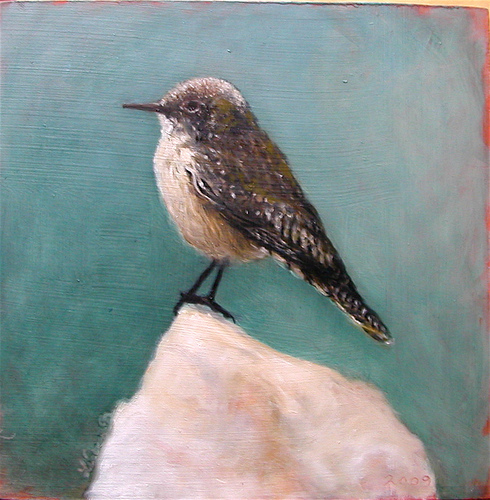


 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

  @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 

                        SEARCH OUTPUT :   . 

  @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 


                  image output loading ... .



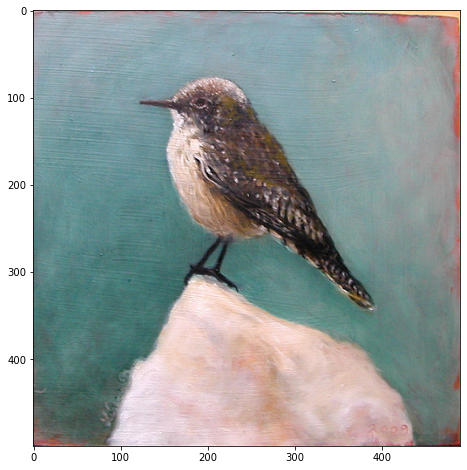


!!!!!!!!!!!!!!!!!!!!!   IMAGE SEARCH OUTPUT PRINT COMPLETED  .   !!!!!!!!!!!!!!!!!!!!!!!!!!!



In [47]:

plt.figure(figsize=(26, 19))
columns = 3 

i = 0    

images = [] 

print(" ", 92*"@", "\n\n", "                      IMAGE USED FOR QUERY : ", " . \n\n ", 92*"@", "\n")
display(Image(filename=input_query_file_path))

print("\n", 91*"|","\n")


for resultPath in resultPaths:
    images.append(mpimg.imread(resultPath))

print(" ",92*"@", "\n\n", "                       SEARCH OUTPUT : ", " . \n\n ", 92*"@", "\n\n")   
print("                  image output loading ... .\n")

image_print_check = 0

for i, image in enumerate(images): 
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
        
plt.show()
    
print("\n!!!!!!!!!!!!!!!!!!!!!   IMAGE SEARCH OUTPUT PRINT COMPLETED  .   !!!!!!!!!!!!!!!!!!!!!!!!!!!\n")    